In [149]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


-  survival - 생존여부 ( 0 = No, 1 = Yes )
-  pclass - 티켓 등급 ( 1 = 1st, 2 = 2nd, 3 = 3rd )
- sex - 성별
- Age - 나이
- sibsp - 타이타닉에 승선한 형제자매 또는 배우자의 수
- parch - 타이타닉에 승선한 부모 - 자식의 수
- ticket - 티켓 번호
- fare - 승선 요금
- cabin - 선실 번호
- embarked - 승선 항구 이름 ( C = Cherbourg, Q = Queenstown, S = Southampton )

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   class     891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


## 전처리

In [150]:
df['age']= df['age'].fillna(df['age'].median())
df['embarked']= df['embarked'].fillna('S')
df.drop(['deck','embark_town'],axis=1,inplace=True)
df.drop(['who','alive'],axis=1,inplace=True)
df.drop(['adult_male'],axis=1,inplace=True)
df['new_sex']=df['sex'].replace(['female','male'],[0,1])

In [151]:
def get_group(v):
    if v == 'S':
        group = 3
    elif v == 'C':
        group = 2
    else:
        group = 1
    return group


df["new_embarked"] = df["embarked"].apply(lambda v: get_group(v))
def class_group(v):
    if v == 'Third':
        group = 3
    elif v == 'Second':
        group = 2
    else:
        group = 1
    return group


df["new_class"] = df["class"].apply(lambda v: class_group(v))


def alone_group(v):
    if v == True:
        group = 1
    else:
        group = 0
    return group


df["new_alone"] = df["alone"].apply(lambda v: alone_group(v))

In [152]:
df.drop(['sex','class','embarked','alone','fare','new_class','new_embarked'],axis=1, inplace=True)

In [154]:
df['age']=df['age'].astype('int64')

 - 전처리 끝 

In [155]:
df.head()

,survived,pclass,age,sibsp,parch,new_sex,new_alone
0,0,3,22,1,0,1,0
1,1,1,38,1,0,0,0
2,1,3,26,0,0,0,1
3,1,1,35,1,0,0,0
4,0,3,35,0,0,1,1


## PCA 시작

In [156]:
#속성과 클래스로 데이터 분류
y_target = df['survived']
X_features =df.drop(['survived'],axis=1)

y_target.value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

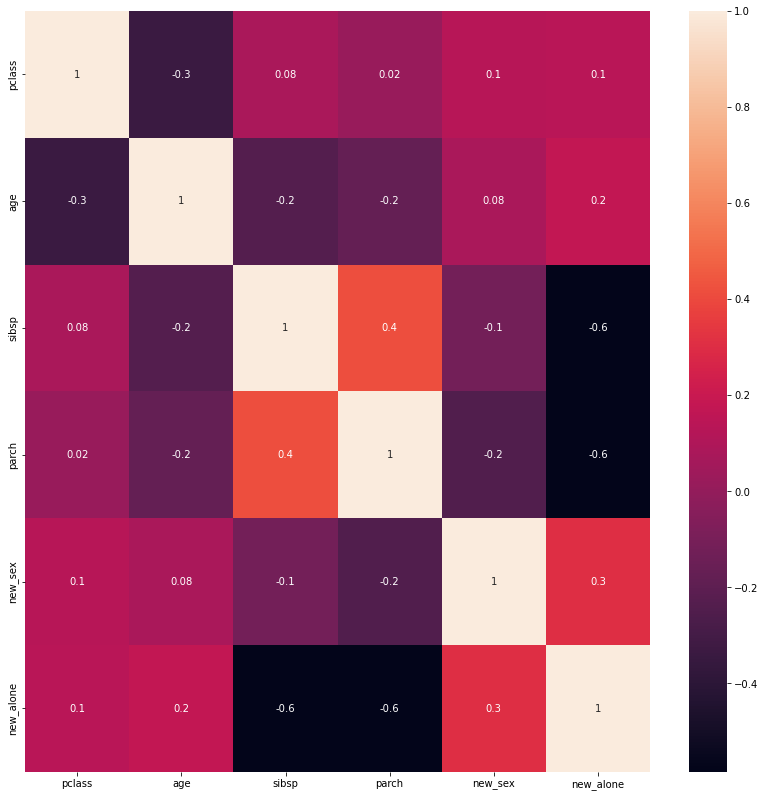

In [157]:
import seaborn as sns
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14)) 
sns.heatmap(corr, annot=True, fmt = '.1g')  # fmt - 정밀도

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
col=['pclass','age','sibsp','parch','new_sex','new_alone']
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[col])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성', pca.explained_variance_ratio_)


PCA Component별 변동성 [0.37952548 0.22703546]


In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf  = RandomForestClassifier(n_estimators=6,random_state=156)

#원본
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy',cv=3)
print('CV=3의 경우 개별 FOLD세트별 정확도',scores)

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3의 경우 개별 FOLD세트별 정확도 [0.77104377 0.80808081 0.79461279]
평균 정확도:0.7912


In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf  = RandomForestClassifier(n_estimators=6,random_state=156)


# PCA 부분
scaler = StandardScaler()
df_scaler= scaler.fit_transform(X_features)
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scaler)
# 여기 까지



scores_df = cross_val_score(rcf, df_pca, y_target, scoring='accuracy',cv=3)
print('CV=3의 경우의 PCA 변환된  개별 FOLD세트별 정확도',scores_df)

print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_df)))

CV=3의 경우의 PCA 변환된  개별 FOLD세트별 정확도 [0.76430976 0.8013468  0.77777778]
PCA 변환 데이터 셋 평균 정확도:0.7811


In [184]:
df

,survived,pclass,age,sibsp,parch,new_sex,new_alone
0,0,3,22,1,0,1,0
1,1,1,38,1,0,0,0
2,1,3,26,0,0,0,1
3,1,1,35,1,0,0,0
4,0,3,35,0,0,1,1
...,...,...,...,...,...,...,...
886,0,2,27,0,0,1,1
887,1,1,19,0,0,0,1
888,0,3,28,1,2,0,0
889,1,1,26,0,0,1,1


In [185]:
from sklearn.model_selection import train_test_split

X = df[['pclass', 'age', 'sibsp', 'parch', 'new_sex', 'new_alone',]].astype('float')

y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)


In [186]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components = n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [187]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns = cols)

In [188]:
import numpy as np

def print_variance_ratio(pca, only_sum = False):
    if only_sum == False:
        print('variance_ratio :', pca.explained_variance_ratio_)
    print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))


In [204]:
pca_data, pca = get_pca_data(X, n_components=2)
print_variance_ratio(pca)

variance_ratio : [0.98346262 0.00828615]
sum of variance_ratio:  0.9917487772208002


In [201]:
pca

PCA(n_components=2)

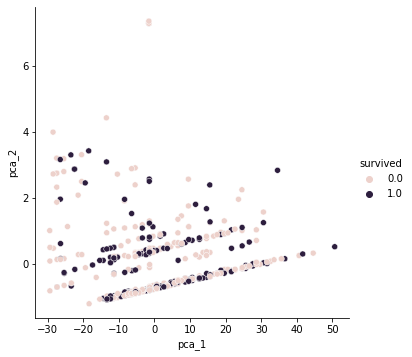

In [200]:
import seaborn as sns

pca_columns = ['pca_1', 'pca_2']
pca_pd = pd.DataFrame(pca_data, columns=pca_columns)
pca_pd['survived'] = y_train

sns.pairplot(pca_pd, hue='survived', height=5,
             x_vars=['pca_1'], y_vars=['pca_2'])

plt.show()